In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns

from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [2]:
def labeling(x):
  ind=[0,1,16,128,512,4096,16384,65536,262144,np.inf]
  for i in range(len(ind)-1):
    if(x>=ind[i] and x<ind[i+1]):
      y=i
      break
  return y

In [3]:


GITHUB_CDN = "https://raw.githubusercontent.com/realamirhe/github-stargazer"
js_repo_urls = map(
    lambda idx: f"{GITHUB_CDN}/master/data/js-{idx}.csv",
    range(1, 10)
)

datas = pd.concat(list(map(pd.read_csv, js_repo_urls)))
datas = datas.select_dtypes(exclude=['object'])
datas = datas.drop(columns=['Unnamed: 0', 'score'], axis=1)
data1 = datas.reset_index()

data1.shape

(900, 25)

In [4]:


GITHUB_CDN = "https://raw.githubusercontent.com/realamirhe/github-stargazer"
js_repo_urls = map(
    lambda idx: f"{GITHUB_CDN}/master/data/py-{idx}.csv",
    range(1, 10)
)

datas = pd.concat(list(map(pd.read_csv, js_repo_urls)))
datas = datas.select_dtypes(exclude=['object'])
datas = datas.drop(columns=['Unnamed: 0', 'score'], axis=1)
data2 = datas.reset_index()

data2.shape

(900, 25)

In [5]:
data=pd.concat([data1,data2])
data.drop_duplicates(inplace=True)
data.shape

(259, 25)

In [6]:
y = data['stargazers_count'].apply(labeling)
X = data.drop(columns=['stargazers_count', 'index', 'watchers', 'watchers_count'])
X = X.replace({ False: 0, True: 1 })
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259 entries, 0 to 99
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   private                      259 non-null    int64
 1   owner.public_repos           259 non-null    int64
 2   owner.public_gists           259 non-null    int64
 3   owner.followers              259 non-null    int64
 4   owner.following              259 non-null    int64
 5   fork                         259 non-null    int64
 6   forks                        259 non-null    int64
 7   size                         259 non-null    int64
 8   has_issues                   259 non-null    int64
 9   has_projects                 259 non-null    int64
 10  has_downloads                259 non-null    int64
 11  has_wiki                     259 non-null    int64
 12  has_pages                    259 non-null    int64
 13  has_discussions              259 non-null    int64


0.9998338204336223


(array([101.,   0.,   0.,  89.,   0.,   0.,  32.,   0.,   0.,  37.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

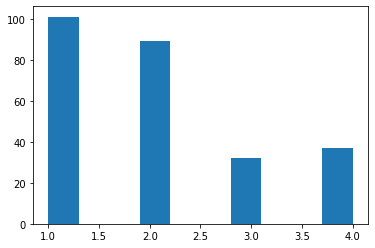

In [7]:
pca=PCA(n_components=2)
pca.fit(X)
print(np.sum(pca.explained_variance_ratio_))
xp=pca.transform(X)
x_train, x_test, y_train, y_test = train_test_split(xp, y, test_size=0.2, random_state=42)
plt.hist(y)

KNeighborsClassifier(n_neighbors=1)


Text(0.5, 1.0, '5-fold cross validation')

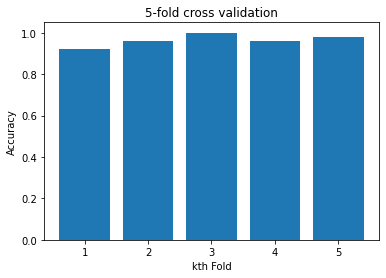

In [8]:
knn = KNeighborsClassifier()
knn_param={'n_neighbors':[1,2,3,4,5,6]}
sh=GridSearchCV(knn,knn_param).fit(x_train,y_train)
print(sh.best_estimator_)
knn=KNeighborsClassifier(n_neighbors=1)
acc=cross_val_score(knn, xp, y, cv=5)
plt.bar(np.arange(5)+1,acc)
plt.xlabel('kth Fold')
plt.ylabel('Accuracy')
plt.title('5-fold cross validation for KNN')

SVC(C=5, gamma='auto')


Text(0.5, 1.0, '5-fold cross validation for SVM')

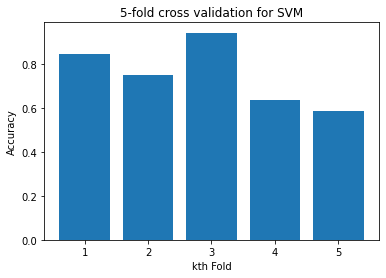

In [14]:
from sklearn.svm import SVC
clf=SVC()
param={'C':[0.5,1,5,10],'gamma':['scale','auto']}
sh=GridSearchCV(clf,param).fit(x_train,y_train)
print(sh.best_estimator_)
clf=SVC(C=5,gamma='auto')
acc=cross_val_score(clf, xp, y, cv=5)
plt.bar(np.arange(5)+1,acc)
plt.xlabel('kth Fold')
plt.ylabel('Accuracy')
plt.title('5-fold cross validation for SVM')

Text(0.5, 1.0, '5-fold cross validation for logestic regression')

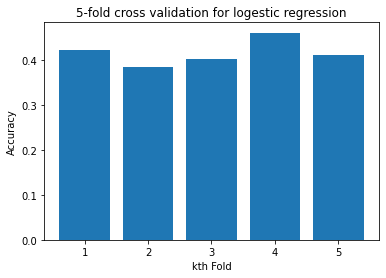

In [13]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
acc=cross_val_score(clf, xp, y, cv=5)
plt.bar(np.arange(5)+1,acc)
plt.xlabel('kth Fold')
plt.ylabel('Accuracy')
plt.title('5-fold cross validation for logestic regression')

DecisionTreeClassifier(max_depth=5)


Text(0.5, 1.0, '5-fold cross validation for logestic regression')

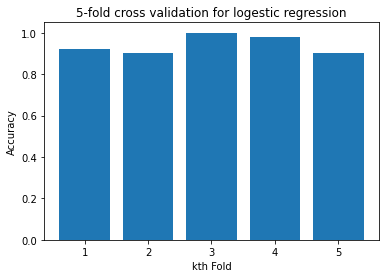

In [23]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
param={'max_depth':[1,3,5]}
sh=GridSearchCV(clf,param).fit(x_train,y_train)
print(sh.best_estimator_)
acc=cross_val_score(clf, xp, y, cv=5)
plt.bar(np.arange(5)+1,acc)
plt.xlabel('kth Fold')
plt.ylabel('Accuracy')
plt.title('5-fold cross validation for logestic regression')